<a href="https://colab.research.google.com/github/Matseko09/Deviare-Dot-Glasses-/blob/main/DOT_Glasses_Feature_Engineering_%26_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Imported Libraries and loaded the dataset


In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('Dots Potential Customer Survey Data.csv')
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

The dataset contains 29 columns and 3220 rows, with no missing values. The columns include both categorical and numerical data.

#2. Data Cleaning

In [22]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values for numeric columns only
# Select numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate medians for numeric columns
numeric_medians = numeric_data.median()


Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0
Has Diabetes            

The above indicates that there are no missing values.

#3. Feature Engineering

In [23]:
# Total Physical Activity Time (sum of indoor and outdoor sports)
data['Total_Physical_Activity_Time'] = (
    data['Time spent playing indoor sports'] + data['Time spent playing outdoor sports']
)

# Screen-to-Activity Ratio (screen time divided by total physical activity time)
data['Screen_to_Activity_Ratio'] = data['Total Time spent working in front of screen'] / (
    data['Total_Physical_Activity_Time'] + 1
)

# Age Group Feature
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Display the first few rows to check the new features
data[['Total_Physical_Activity_Time', 'Screen_to_Activity_Ratio', 'Age_Group']].head()

,Total_Physical_Activity_Time,Screen_to_Activity_Ratio,Age_Group
0,7,0.875000,Child
1,4,2.000000,Child
2,3,1.000000,Child
3,6,1.428571,Child
4,7,1.625000,Child


from matplotlib import pyplot as plt
_df_0['Total_Physical_Activity_Time'].plot(kind='hist', bins=20, title='Total_Physical_Activity_Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Screen_to_Activity_Ratio'].plot(kind='hist', bins=20, title='Screen_to_Activity_Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Total_Physical_Activity_Time', y='Screen_to_Activity_Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Total_Physical_Activity_Time']
  ys = series['Screen_to_Activity_Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Total_Physical_Activity_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total_Physical_Activity_Time')
_ = plt.ylabel('Screen_to_Activity_Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Total_Physical_Activity_Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Total_Physical_Activity_Time'}, axis=1)
              .sort_values('Total_Physical_Activity_Time', ascending=True))
  xs = counted['Total_Physical_Activity_Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Total_Physical_Activity_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total_Physical_Activity_Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Total_Physical_Activity_Time'].plot(kind='line', figsize=(8, 4), title='Total_Physical_Activity_Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Screen_to_Activity_Ratio'].plot(kind='line', figsize=(8, 4), title='Screen_to_Activity_Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

New features have been successfully engineered:

Total Physical Activity Time: Sum of indoor and outdoor sports time.
Screen-to-Activity Ratio: Screen time divided by physical activity time (to assess sedentary behavior).
Age Group: Segmented into categories: Child, Young Adult, Adult, and Senior.

3.1. Visualized the distributions of features and explored their relationships with the target variables.

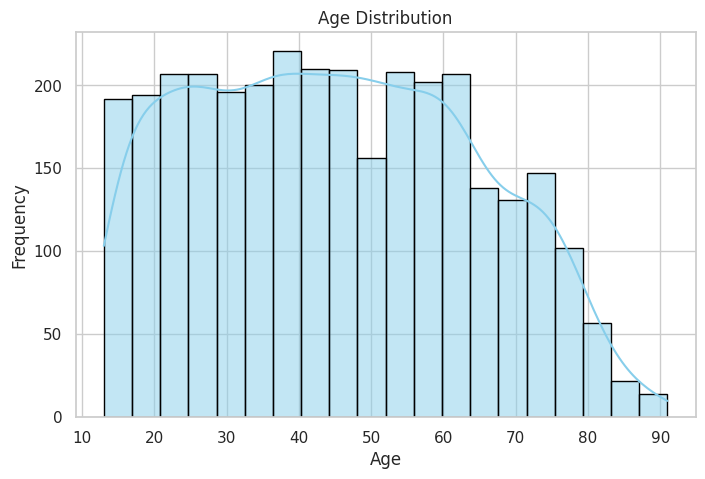

<ipython-input-24-e9879b44b2d4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Annual Family Income ($)', palette='pastel')


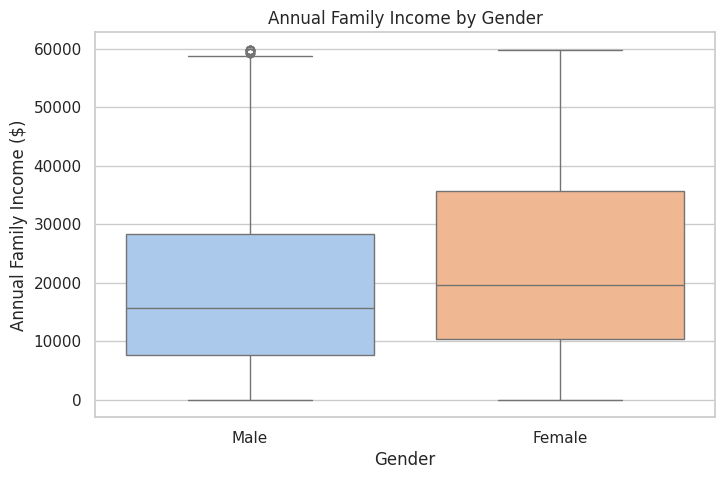

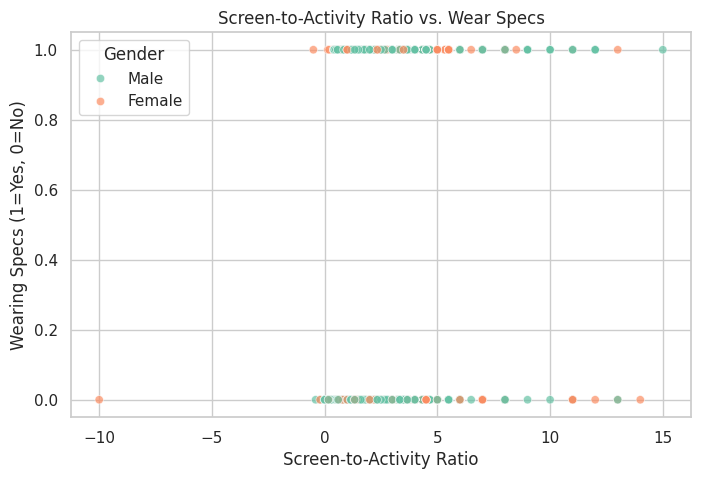

<ipython-input-24-e9879b44b2d4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age_Group', y='Total_Physical_Activity_Time', palette='muted')


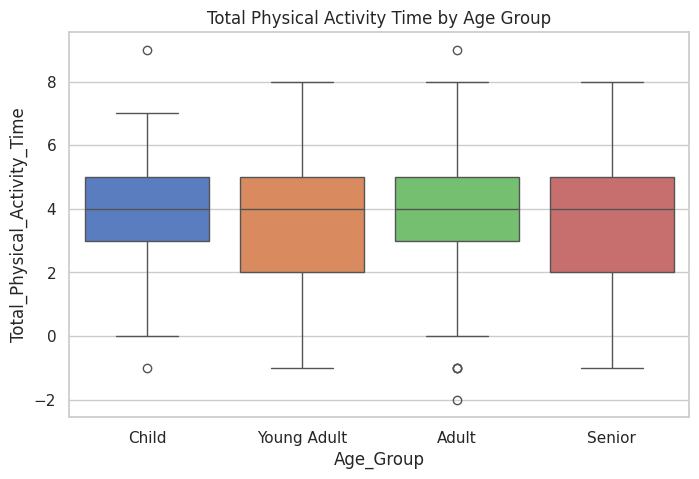

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualizing the distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Annual Family Income by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Gender', y='Annual Family Income ($)', palette='pastel')
plt.title('Annual Family Income by Gender')
plt.show()

# Scatter plot: Screen-to-Activity Ratio vs. Wear Specs
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Screen_to_Activity_Ratio', y='Wear Specs', hue='Gender', palette='Set2', alpha=0.7)
plt.title('Screen-to-Activity Ratio vs. Wear Specs')
plt.xlabel('Screen-to-Activity Ratio')
plt.ylabel('Wearing Specs (1=Yes, 0=No)')
plt.show()

# Distribution of Total Physical Activity Time by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Age_Group', y='Total_Physical_Activity_Time', palette='muted')
plt.title('Total Physical Activity Time by Age Group')
plt.show()


#6.  Interpretations

6.1. Age Distribution:

Most customers fall into the younger age groups, with a gradual decline as age increases.

6.2. Annual Family Income by Gender:

Both genders have similar median incomes, but there is noticeable variability within each group.

6.3. Screen-to-Activity Ratio vs. Wear Specs:

A higher Screen-to-Activity Ratio appears to be associated with wearing glasses, especially among females.

6.4. Total Physical Activity Time by Age Group:

Physical activity tends to decrease with age, with younger age groups (Child and Young Adult) having higher activity times.